### <div style="text-align: left; background-color: #003554; color: white; padding: 10px; line-height: 1">PS2-1  Logistic Regression - Training Stability</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import util as util

In [2]:
x_train_a, y_train_a = util.load_csv('ds1_a.csv', add_intercept=True)
x_train_b, y_train_b = util.load_csv('ds1_b.csv', add_intercept=True)

In [3]:
def plot(x, y, title):
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == -1, -2], x[y == -1, -1], 'go', linewidth=2)
    plt.suptitle(title, fontsize=12)

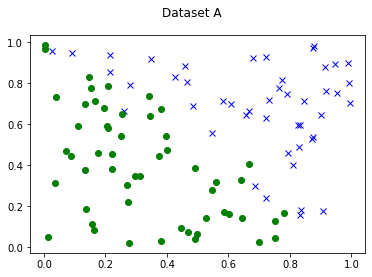

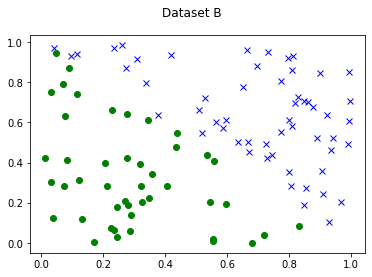

In [4]:
plot(x_train_a, y_train_a, 'Dataset A')
plot(x_train_b, y_train_b, 'Dataset B')

we can see that the gradient of the cost function is
$$
\nabla_{\theta} J(\theta)=-\frac{1}{m} \sum_{i=1}^{m} \frac{y^{(i)} x^{(i)}}{1+\exp \left(y^{(i)} \theta^{T} x^{(i)}\right)}
$$
which means that the gradient descent algorithm is trying to minimize
$$
\ell(\theta)=-\frac{1}{m} \sum_{i=1}^{m} \log \frac{1}{1+\exp \left(-y^{(i)} \theta^{T} x^{(i)}\right)}
$$
If a dataset is completely linearly separable, i.e. $\forall i \in\{1, \ldots, m\}, y^{(i)} \theta^{T} x^{(i)}>0$, then, by multiplying a larger positive scalar, there will always be a new $\theta$ that makes $\ell(\theta)$ even smaller, which prevents the algorithm from converging. However, if the dataset is not linearly separable, $\theta$ cannot be generated in such way while minimizing $\ell(\theta)$.
(c)
i.
No. A different fixed learning rate is only a scalar for $\nabla_{\theta} J(\theta)$.
ii.
Yes. By decreasing the learning rate over time, the algorithm will eventually find some $\theta$ whose change is small enough to meet the stop criterion.
iii.
No. Linear scaling of the input features can be treated as a scalar applied to $\theta$.
iv.
Yes. An L2 regularization term can keep $\theta$ from arbitrarily scaling.
V.
Yes. Adding zero-mean Gaussian noise to the training data or labels helps so long as the dataset is not linearly separab
(d)
No. SVM with hinge loss is not vulnerable to linearly separable datasets.
If the dataset is linearly separable, the hinge loss will be minimized to 0 , and the algorithm then stops.

To make a prediction, instead of computing the probabilities explicitly, we compare the logarithm of $p(y=1 \mid x) / p(y=0 \mid x)$ with 0 .
$$
\begin{aligned}
\log \frac{p(y=1 \mid x)}{p(y=0 \mid x)} &=\log \frac{p(x \mid y=1) p(y=1)}{p(x \mid y=0) p(y=0)} \\
&=\log \frac{\left(\prod_{k=1}^{n} p\left(x_{k} \mid y=1\right)\right) p(y=1)}{\left(\prod_{k=1}^{n} p\left(x_{k} \mid y=0\right)\right) p(y=0)} \\
&=\sum_{k=1}^{n} x_{k}\left(\log \phi_{k \mid y=1}-\log \phi_{k \mid y=0}\right)+\log \frac{\phi_{y}}{1-\phi_{y}}
\end{aligned}
$$

### <div style="text-align: left; background-color: #003554; color: white; padding: 10px; line-height: 1">PS2-2 Model Calibration</div>
#### (a)
To derive the maximum likelihood parameters $\theta \in \mathbb{R}^{n+1}, \forall j \in\{0, \ldots, n\}$,

$$
\begin{aligned}
\frac{\partial}{\partial \theta_{j}} \ell(\theta) &=\sum_{i=1}^{m}\left(y^{(i)}-h_{\theta}\left(x^{(i)}\right)\right) x_{j}^{(i)} \\
&=0
\end{aligned}
$$

Let $j=0$. Since $x_{0}^{(i)}=1$, the above equation becomes

$$
\sum_{i=1}^{m}\left(y^{(i)}-h_{\theta}\left(x^{(i)}\right)\right)=0
$$

In other words,

$$
\sum_{i=1}^{m} h_{\theta}\left(x^{(i)}\right)=\sum_{i=1}^{m} y^{(i)}
$$

Because $(a, b)=(0,1)$ and $y^{(i)} \in\{0,1\}$,

$$
\begin{aligned}
\frac{\sum_{i \in I_{a, b}} P\left(y^{(i)}=1 \mid x^{(i)} ; \theta\right)}{\left|\left\{i \in I_{a, b}\right\}\right|} &=\frac{1}{m} \sum_{i \in I_{a, b}} h_{\theta}\left(x^{(i)}\right) \\
&=\frac{1}{m} \sum_{i \in I_{a, b}} \mathbb{I}\left\{y^{(i)}=1\right\} \\
&=\frac{\sum_{i \in I_{a, b}} \mathbb{I}\left\{y^{(i)}=1\right\}}{\left|\left\{i \in I_{a, b}\right\}\right|}
\end{aligned}
$$

#### (b)
No. A perfectly calibrated binary classification model does not necessarily imply that the model achieves perfect accuracy.
Suppose our dataset is $\left\{\left(x^{(i)}, y^{(i)}=1\right)\right\}_{i=1}^{m}$. If the model is perfectly calibrated, for $(a, b)=\left(\frac{1}{2}, 1\right)$, we have:

$$
\frac{\sum_{i \in I_{a, b}} \mathbb{I}\left\{y^{(i)}=1\right\}}{\left|\left\{i \in I_{a, b}\right\}\right|}=\frac{\sum_{i \in I_{a, b}} P\left(y^{(i)}=1 \mid x^{(i)} ; \theta\right)}{\left|\left\{i \in I_{a, b}\right\}\right|}<1
$$

which indicates that it does not have perfect accuracy.
Also, a model having perfect accuracy does not mean it is perfectly calibrated. Because

$$
\frac{\sum_{i \in I_{a, b}} \mathbb{I}\left\{y^{(i)}=1\right\}}{\left|\left\{i \in I_{a, b}\right\}\right|}=1>\frac{\sum_{i \in I_{a, b}} P\left(y^{(i)}=1 \mid x^{(i)} ; \theta\right)}{\left|\left\{i \in I_{a, b}\right\}\right|}
$$

#### (c)
Apply L2 regularization to the cost function,

$$
\begin{aligned}
\frac{\partial}{\partial \theta_{j}} J(\theta) &=-\sum_{i=1}^{m}\left(y^{(i)}-h_{\theta}\left(x^{(i)}\right)\right) x_{j}^{(i)}+\lambda \theta_{j} \\
&=0
\end{aligned}
$$
Obviously, if $\theta_{0}=0$, the property still holds. Otherwise, no.

### <div style="text-align: left; background-color: #003554; color: white; padding: 10px; line-height: 1">PS2-3 Bayesian Interpretation of Regularization</div>
#### (a)
Proof:
$$
\begin{aligned}
\theta_{\mathrm{MAP}} &=\arg \max _{\theta} p(\theta \mid x, y) \\
&=\arg \max _{\theta} \frac{p(y \mid x, \theta) p(x, \theta)}{p(x, y)} \\
&=\arg \max _{\theta} \frac{p(y \mid x, \theta) p(\theta \mid x) p(x)}{p(x, y)} \\
&=\arg \max _{\theta} \frac{p(y \mid x, \theta) p(\theta) p(x)}{p(x, y)} \\
&=\arg \max _{\theta} p(y \mid x, \theta) p(\theta)
\end{aligned}
$$

#### (b)
Since $p(\theta) \sim \mathcal{N}\left(0, \eta^{2} I\right)$
$$
\begin{aligned}
\theta_{\mathrm{MAP}} &=\arg \max _{\theta} p(y \mid x, \theta) p(\theta) \\
&=\arg \min _{\theta}-\log p(y \mid x, \theta)-\log p(\theta) \\
&=\arg \min _{\theta}-\log p(y \mid x, \theta)-\log \frac{1}{(2 \pi)^{d / 2}|\Sigma|^{1 / 2}} \exp \left(-\frac{1}{2}(\theta-\mu)^{T} \Sigma^{-1}(\theta-\mu)\right) \\
&=\arg \min _{\theta}-\log p(y \mid x, \theta)+\frac{1}{2} \theta^{T} \Sigma^{-1} \theta \\
&=\arg \min _{\theta}-\log p(y \mid x, \theta)+\frac{1}{2 \eta^{2}}\|\theta\|_{2}^{2} \\
&=\arg \min _{\theta}-\log p(y \mid x, \theta)+\lambda\|\theta\|_{2}^{2}
\end{aligned}
$$
where $\lambda=1 /\left(2 \eta^{2}\right)$.

#### (c)
Given $y=\theta^{T} x+\epsilon$ where $\epsilon \sim \mathcal{N}\left(0, \sigma^{2}\right)$, i.e. $y \mid x ; \theta \sim \mathcal{N}\left(\theta^{T} x, \sigma^{2}\right)$,
$$
\begin{aligned}
\theta_{\mathrm{MAP}} &=\arg \min _{\theta}-\sum_{i=1}^{m} \log \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{\left(y^{(i)}-\theta^{T} x^{(i)}\right)^{2}}{2 \sigma^{2}}\right)+\lambda\|\theta\|_{2}^{2} \\
&=\arg \min _{\theta} \frac{1}{2 \sigma^{2}} \sum_{i=1}^{m}\left(y^{(i)}-\theta^{T} x^{(i)}\right)^{2}+\frac{1}{2 \eta^{2}}\|\theta\|_{2}^{2} \\
&=\arg \min _{\theta} \frac{1}{2 \sigma^{2}}(\vec{y}-X \theta)^{T}(\vec{y}-X \theta)+\frac{1}{2 \eta^{2}}\|\theta\|_{2}^{2} \\
&=\arg \min _{\theta} J(\theta)
\end{aligned}
$$
By solving
$$
\begin{aligned}
\nabla_{\theta} J(\theta) &=\nabla_{\theta}\left(\frac{1}{2 \sigma^{2}}(\vec{y}-X \theta)^{T}(\vec{y}-X \theta)+\frac{1}{2 \eta^{2}}\|\theta\|\right.\\
&=\frac{1}{2 \sigma^{2}} \nabla_{\theta}\left(\theta^{T} X^{T} X \theta-2 \vec{y}^{T} X \theta+\frac{\sigma^{2}}{\eta^{2}} \theta^{T} \theta\right) \\
&=\frac{1}{\sigma^{2}}\left(X^{T} X \theta-X^{T} \vec{y}+\frac{\sigma^{2}}{\eta^{2}} \theta\right) \\
&=0
\end{aligned}
$$
we obtain
$$
\theta_{\mathrm{MAP}}=\left(X^{T} X+\frac{\sigma^{2}}{\eta^{2}} I\right)^{-1} X^{T} \vec{y}
$$

#### (d)
Assume $\theta \in \mathbb{R}^{n}$. Given $\theta_{i} \sim \mathcal{L}(0, b)$ and $y=\theta^{T} x+\epsilon$ where $\epsilon \sim \mathcal{N}\left(0, \sigma^{2}\right)$, we have
$$
\begin{aligned}
\theta_{\mathrm{MAP}} &=\arg \min _{\theta}-\sum_{i=1}^{m} \log \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{\left(y^{(i)}-\theta^{T} x^{(i)}\right)^{2}}{2 \sigma^{2}}\right)-\sum_{i=1}^{n} \log \frac{1}{2 b} \exp \left(-\frac{\left|\theta_{i}-0\right|}{b}\right) \\
&=\arg \min _{\theta} \frac{1}{2 \sigma^{2}} \sum_{i=1}^{m}\left(y^{(i)}-\theta^{T} x^{(i)}\right)^{2}+\sum_{i=1}^{n} \frac{1}{b}\left|\theta_{i}\right| \\
&=\arg \min _{\theta} \frac{1}{2 \sigma^{2}}\|X \theta-\vec{y}\|_{2}^{2}+\frac{1}{b}\|\theta\|_{1} \\
&=\arg \min _{\theta}\|X \theta-\vec{y}\|_{2}^{2}+\frac{2 \sigma^{2}}{b}\|\theta\|_{1}
\end{aligned}
$$
Therefore,
$$
J(\theta)=\|X \theta-\vec{y}\|_{2}^{2}+\frac{2 \sigma^{2}}{b}\|\theta\|_{1}
$$

### <div style="text-align: left; background-color: #003554; color: white; padding: 10px; line-height: 1">PS2-4 Constructing kernels</div>
#### (a)
$K(x, z)=K_{1}(x, z)+K_{2}(x, z)$ is a valid kernel.
Because for any $z \in \mathbb{R}^{n}$,
$$
\begin{aligned}
z^{T} K z &=\sum_{i} \sum_{j} z_{i} K_{i j} z_{j} \\
&=\sum_{i} \sum_{j} z_{i} K\left(x^{(i)}, x^{(j)}\right) z_{j} \\
&=\sum_{i} \sum_{j} z_{i}\left(K_{1}\left(x^{(i)}, x^{(j)}\right)+K_{2}\left(x^{(i)}, x^{(j)}\right)\right) z_{j} \\
&=\sum_{i} \sum_{j} z_{i} K_{1}\left(x^{(i)}, x^{(j)}\right) z_{j}+\sum_{i} \sum_{j} z_{i} K_{2}\left(x^{(i)}, x^{(j)}\right) z_{j} \\
&=z^{T} K_{1} z+z^{T} K_{2} z \\
& \geq 0
\end{aligned}
$$
#### (b)
$K(x, z)=K_{1}(x, z)-K_{2}(x, z)$ is not necessarily a valid kernel.
For example, $K_{2}(x, z)=2 K_{1}(x, z)$, then $z^{T} K z=-z^{T} K_{1} z \leq 0$.
#### (c)
Assume $a>0, K(x, z)=a K_{1}(x, z)$ is a valid kernel.
Because for any $z \in \mathbb{R}^{n}$,
$$
\begin{aligned}
z^{T} K z &=\sum_{i} \sum_{j} z_{i} K_{i j} z_{j} \\
&=\sum_{i} \sum_{j} z_{i} K\left(x^{(i)}, x^{(j)}\right) z_{j} \\
&=\sum_{i} \sum_{j} z_{i} a K_{1}\left(x^{(i)}, x^{(j)}\right) z_{j} \\
&=a z^{T} K_{1} z \\
& \geq 0
\end{aligned}
$$
#### (d)
Assume $a>0, K(x, z)=-a K_{1}(x, z)$ is not a valid kernel.
For example, $a=-1$, then $z^{T} K z=-z^{T} K_{1} z \leq 0$.
(e)
$K(x, z)=K_{1}(x, z) K_{2}(x, z)$ is a valid kernel.
Because for any $z \in \mathbb{R}^{n}$,
$$
\begin{aligned}
z^{T} K z &=\sum_{i} \sum_{j} z_{i} K_{i j} z_{j} \\
&=\sum_{i} \sum_{j} z_{i} K\left(x^{(i)}, x^{(j)}\right) z_{j} \\
&=\sum_{i} \sum_{j} z_{i} K_{1}\left(x^{(i)}, x^{(j)}\right) K_{2}\left(x^{(i)}, x^{(j)}\right) z_{j} \\
&=\sum_{i} \sum_{j} z_{i} \phi_{1}\left(x^{(i)}\right)^{T} \phi_{1}\left(x^{(j)}\right) \phi_{2}\left(x^{(i)}\right)^{T} \phi_{2}\left(x^{(j)}\right) z_{j} \\
&=\sum_{i} \sum_{j} z_{i} \sum_{k} \phi_{1 k}\left(x^{(i)}\right) \phi_{1 k}\left(x^{(j)}\right) \sum_{l} \phi_{2 l}\left(x^{(i)}\right) \phi_{2 l}\left(x^{(j)}\right) z_{j} \\
&=\sum_{k} \sum_{l} \sum_{i} \sum_{j} z_{i} \phi_{1 k}\left(x^{(i)}\right) \phi_{2 l}\left(x^{(i)}\right) z_{j} \phi_{1 k}\left(x^{(j)}\right) \phi_{2 l}\left(x^{(j)}\right) \\
&=\sum_{k} \sum_{l}\left(\sum_{i} z_{i} \phi_{1 k}\left(x^{(i)}\right) \phi_{2 l}\left(x^{(i)}\right)\right)^{2} \\
& \geq 0
\end{aligned}
$$
(f)
$K(x, z)=f(x) f(z)$ is a valid kernel.
Because for any $z \in \mathbb{R}^{n}$,
$$
\begin{aligned}
z^{T} K z &=\sum_{i} \sum_{j} z_{i} K_{i j} z_{j} \\
&=\sum_{i} \sum_{j} z_{i} K\left(x^{(i)}, x^{(j)}\right) z_{j} \\
&=\sum_{i} \sum_{j} z_{i} f\left(x^{(i)}\right) f\left(x^{(j)}\right) z_{j} \\
&=\left(\sum_{i} f\left(x^{(i)}\right) z_{i}\right)^{2} \\
& \geq 0
\end{aligned}
$$
(g)
$K(x, z)=K_{3}(\phi(x), \phi(z))$ is a valid kernel, because $K_{3}(x, z)$ is a kernel, no matter what the inputs are.
(h)
When $p(x)$ is a polynomial over $\mathrm{x}$ with positive coefficients, $K(x, z)=p\left(K_{1}(x, z)\right)$ is a valid kernel.
Let $p\left(K_{1}(x, z)\right)=\sum_{k} a_{k} K_{1}(x, z)^{k}$ where $a_{k}>0$. conclude that $\sum_{k} a_{k} K_{1}(x, z)^{k}$ is a valid kernel.

### <div style="text-align: left; background-color: #003554; color: white; padding: 10px; line-height: 1">PS2-5 Kernelizing the Perceptron</div>
#### (a)
i.
Recall the update rule
$$
\theta^{(i+1)}:=\theta^{(i)}+\alpha\left(y^{(i+1)}-h_{\theta^{(i)}}\left(\phi\left(x^{(i+1)}\right)\right)\right) \phi\left(x^{(i+1)}\right)
$$
We can easily figure out that $\theta^{(i)}$ is a linear combination of $\phi\left(x^{(1)}\right), \ldots, \phi\left(x^{(i)}\right)$, that is
$$
\begin{aligned}
&\theta^{(i)}=\sum_{j=1}^{i} \beta_{j} \phi\left(x^{(j)}\right) \\
&\theta^{(0)}=\overrightarrow{0}
\end{aligned}
$$
ii.
$$
\begin{aligned}
h_{\theta^{(i)}}\left(\phi\left(x^{(i+1)}\right)\right) &=\operatorname{sign}\left(\left(\theta^{(i)}\right)^{T} \phi\left(x^{(i+1)}\right)\right) \\
&=\operatorname{sign}\left(\sum_{j=1}^{i} \beta_{j} \phi\left(x^{(j)}\right)^{T} \phi\left(x^{(i+1)}\right)\right) \\
&=\operatorname{sign}\left(\sum_{j=1}^{i} \beta_{j}\left\langle\phi\left(x^{(j)}\right), \phi\left(x^{(i+1)}\right)\right\rangle\right) \\
&=\operatorname{sign}\left(\sum_{j=1}^{i} \beta_{j} K\left(x^{(j)}, x^{(i+1)}\right)\right)
\end{aligned}
$$
iii.
$$
\begin{aligned}
\theta^{(i+1)}: &=\theta^{(i)}+\alpha\left(y^{(i+1)}-h_{\theta^{(i)}}\left(\phi\left(x^{(i+1)}\right)\right)\right) \phi\left(x^{(i+1)}\right) \\
&=\sum_{j=1}^{i} \beta_{j} \phi\left(x^{(j)}\right)+\underbrace{\alpha\left(y^{(i+1)}-\operatorname{sign}\left(\sum_{j=1}^{i} \beta_{j} K\left(x^{(j)}, x^{(i+1)}\right)\right)\right)}_{\beta_{i+1}} \phi\left(x^{(i+1)}\right) \\
&=\sum_{j=1}^{i+1} \beta_{j} \phi\left(x^{(j)}\right)
\end{aligned}
$$
Therefore, the new update rule is:
$$
\beta_{i+1}:=\alpha\left(y^{(i+1)}-\operatorname{sign}\left(\sum_{j=1}^{i} \beta_{j} K\left(x^{(j)}, x^{(i+1)}\right)\right)\right)
$$

In [5]:
def initial_state():
    """Return the initial state for the perceptron.

    Returns:
        An array of tuples. Each tuple comprises a training example and the corresponding `beta`.
    """
    return []

In [6]:
def predict(state, kernel, x_i):
    """Perform a prediction on a given instance x_i given the current state and the kernel.

    Args:
        state: The state returned from initial_state()
        kernel: A binary function that takes two vectors as input and returns the result of a kernel
        x_i: A vector containing the features for a single instance

    Returns:
        Returns the prediction (i.e 0 or 1)
    """
    return sign(sum(beta * kernel(x, x_i) for beta, x in state))

In [7]:
def update_state(state, kernel, learning_rate, x_i, y_i):
    """Updates the state of the perceptron.

    Args:
        state: The state returned from initial_state()
        kernel: A binary function that takes two vectors as input and returns the result of a kernel
        learning_rate: The learning rate for the update
        x_i: A vector containing the features for a single instance
        y_i: A 0 or 1 indicating the label for a single instance
    """
    beta_i = learning_rate * (y_i - sign(sum(beta * kernel(x, x_i) for beta, x in state)))
    state.append((beta_i, x_i))

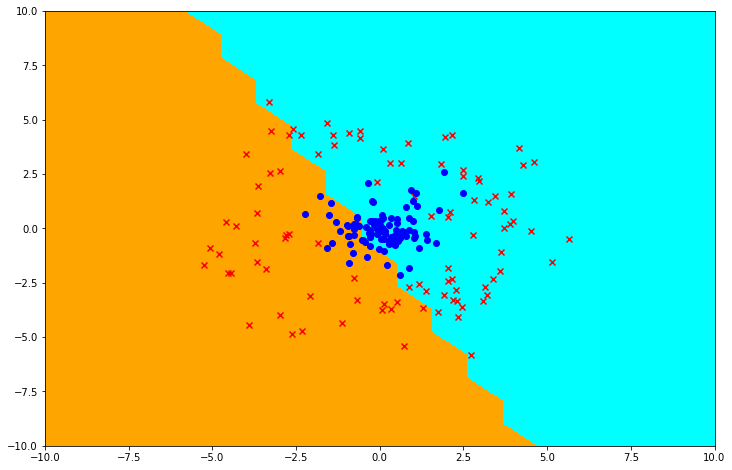

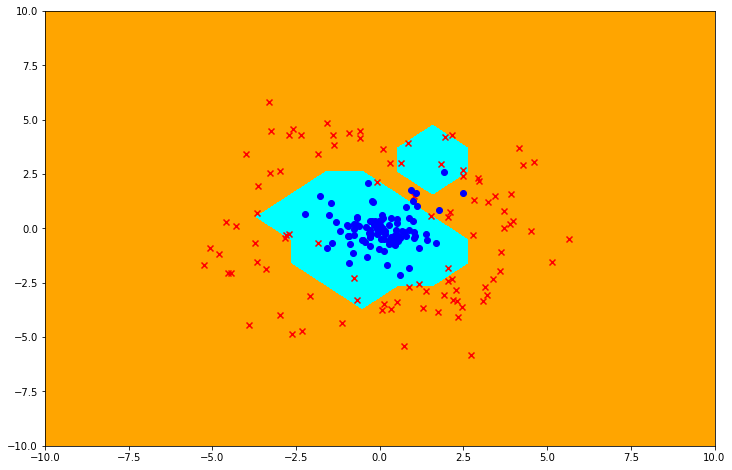

In [8]:
import math

import matplotlib.pyplot as plt
import numpy as np

import util as util


def sign(a):
    """Gets the sign of a scalar input."""
    if a >= 0:
        return 1
    else:
        return 0


def dot_kernel(a, b):
    """An implementation of a dot product kernel.

    Args:
        a: A vector
        b: A vector
    """
    return np.dot(a, b)


def rbf_kernel(a, b, sigma=1):
    """An implementation of the radial basis function kernel.

    Args:
        a: A vector
        b: A vector
        sigma: The radius of the kernel
    """
    distance = (a - b).dot(a - b)
    scaled_distance = -distance / (2 * (sigma) ** 2)
    return math.exp(scaled_distance)


def train_perceptron(kernel_name, kernel, learning_rate):
    """Train a perceptron with the given kernel.

    This function trains a perceptron with a given kernel and then
    uses that perceptron to make predictions.
    The output predictions are saved to src/output/p05_{kernel_name}_predictions.txt.
    The output plots are saved to src/output_{kernel_name}_output.pdf.

    Args:
        kernel_name: The name of the kernel.
        kernel: The kernel function.
        learning_rate: The learning rate for training.
    """
    train_x, train_y = util.load_csv('ds5_train.csv')

    state = initial_state()

    for x_i, y_i in zip(train_x, train_y):
        update_state(state, kernel, learning_rate, x_i, y_i)

    test_x, test_y = util.load_csv('ds5_train.csv')

    plt.figure(figsize=(12, 8))
    util.plot_contour(lambda a: predict(state, kernel, a))
    util.plot_points(test_x, test_y)


train_perceptron('dot', dot_kernel, 0.5)
train_perceptron('rbf', rbf_kernel, 0.5)

### <div style="text-align: left; background-color: #003554; color: white; padding: 10px; line-height: 1">PS2-6  Spam Classification</div>

In [9]:
import collections

import numpy as np

import svm as svm
import util as util

In [10]:
def get_words(message):
    """Get the normalized list of words from a message string.

    This function should split a message into words, normalize them, and return
    the resulting list. For splitting, you should split on spaces. For normalization,
    you should convert everything to lowercase.

    Args:
        message: A string containing an SMS message

    Returns:
       The list of normalized words from the message.
    """
    return message.lower().split()

In [11]:
def create_dictionary(messages):
    """Create a dictionary mapping words to integer indices.

    This function should create a dictionary of word to indices using the provided
    training messages. Use get_words to process each message.

    Rare words are often not useful for modeling. Please only add words to the dictionary
    if they occur in at least five messages.

    Args:
        messages: A list of strings containing SMS messages

    Returns:
        A python dict mapping words to integers.
    """
    # Extract words and flatten the word list
    words = [word for message in messages for word in get_words(message)]

    # Create word count dictionary
    word_counts = collections.Counter(words)

    # Filter out rare words
    freq_words = [word for word, count in word_counts.items() if count >= 5]

    return { word: index for index, word in enumerate(freq_words) }

In [12]:
def transform_text(messages, word_dictionary):
    """Transform a list of text messages into a numpy array for further processing.

    This function should create a numpy array that contains the number of times each word
    appears in each message. Each row in the resulting array should correspond to each
    message and each column should correspond to a word.

    Use the provided word dictionary to map words to column indices. Ignore words that
    are not present in the dictionary. Use get_words to get the words for a message.

    Args:
        messages: A list of strings where each string is an SMS message.
        word_dictionary: A python dict mapping words to integers.

    Returns:
        A numpy array marking the words present in each message.
    """

    m, n = len(messages), len(word_dictionary)
    word_counts = [collections.Counter(get_words(message)) for message in messages]

    matrix = np.zeros((m, n), dtype=int)

    for i in range(m):
        for word, count in word_counts[i].items():
            if word in word_dictionary:
                matrix[i][word_dictionary[word]] += count

    return matrix


#### (b)
$$
\begin{aligned}
\ell\left(\phi_{y}, \phi_{k \mid y=1}, \phi_{k \mid y=0}\right) &=\sum_{i=1}^{m} \log p\left(x^{(i)}, y^{(i)} ; \phi_{y}, \phi_{k \mid y=1}, \phi_{k \mid y=0}\right) \\
&=\sum_{i=1}^{m} \log p\left(x^{(i)} \mid y^{(i)} ; \phi_{k \mid y=1}, \phi_{k \mid y=0}\right) p\left(y^{(i)} ; \phi_{y}\right)
\end{aligned}
$$

where $x^{(i)} \mid y^{(i)=1} ; \phi_{k \mid y=1} \sim \operatorname{Mult}\left(n, \phi_{k \mid y=1}\right), \phi_{k \mid y=1}$ is the probability that word $k$ appears given $y=1$. Similar for $\phi_{k \mid y=0}$.
Therefore, to maximize $\ell$ w.r.t $\phi_{k \mid y=1}$ is equivalent to maximizing
$$
\sum_{i=1}^{m} 1\left\{y^{(i)}=1\right\} \sum_{k=1}^{n} x_{k}^{(i)} \log \phi_{k \mid y=1}
$$

subject to the constraints $\phi_{k \mid y=1} \geq 0$ and $\sum_{k=1}^{n} \phi_{k \mid y=1}=1$, where $x_{k}^{(i)}$ is the number of times that word $k$ appears in the $i$-th message.
By introducing a Lagrange multiplier $\lambda \in \mathbb{R}$ corresponding to the second constraint, we have

$$
\mathcal{L}\left(\lambda, \phi_{k \mid y=1}\right)=\sum_{i=1}^{m} 1\left\{y^{(i)}=1\right\} \sum_{i=1}^{n} x_{k}^{(i)} \log \phi_{k \mid y=1}-\lambda\left(\sum_{k=1}^{n} \phi_{k \mid y=1}-1\right)
$$

By solving the Lagrange multiplier problem and applying Laplace smoothing,

$$
\phi_{k \mid y=1}:=\frac{1+\sum_{i=1}^{m} 1\left\{y^{(i)}=1\right\} x_{k}^{(i)}}{n+\sum_{i=1}^{m} 1\left\{y^{(i)}=1\right\} \sum_{j=1}^{n} x_{j}^{(i)}}
$$
Similarly,
$$
\phi_{k \mid y=0}:=\frac{1+\sum_{i=1}^{m} 1\left\{y^{(i)}=0\right\} x_{k}^{(i)}}{n+\sum_{i=1}^{m} 1\left\{y^{(i)}=0\right\} \sum_{j=1}^{n} x_{j}^{(i)}}
$$
and $\phi_{y}$ is still $(1 / m) \sum_{i=1}^{m} 1\left\{y^{(i)}=1\right\}$.

In [13]:
def fit_naive_bayes_model(matrix, labels):
    """Fit a naive bayes model.

    This function should fit a Naive Bayes model given a training matrix and labels.

    The function should return the state of that model.

    Feel free to use whatever datatype you wish for the state of the model.

    Args:
        matrix: A numpy array containing word counts for the training data
        labels: The binary (0 or 1) labels for that training data

    Returns: The trained model
    """

    _, n = matrix.shape

    phi_y = np.mean(labels)
    phi_k_y1 = (1 + matrix[labels == 1].sum(axis=0)) / (n + matrix[labels == 1].sum())
    phi_k_y0 = (1 + matrix[labels == 0].sum(axis=0)) / (n + matrix[labels == 0].sum())

    return phi_y, phi_k_y1, phi_k_y0

To make a prediction, instead of computing the probabilities explicitly, we compare the logarithm of $p(y=1 \mid x) / p(y=0 \mid x)$ with

$$
\begin{aligned}
\log \frac{p(y=1 \mid x)}{p(y=0 \mid x)} &=\log \frac{p(x \mid y=1) p(y=1)}{p(x \mid y=0) p(y=0)} \\
&=\log \frac{\left(\prod_{k=1}^{n} p\left(x_{k} \mid y=1\right)\right) p(y=1)}{\left(\prod_{k=1}^{n} p\left(x_{k} \mid y=0\right)\right) p(y=0)} \\
&=\sum_{k=1}^{n} x_{k}\left(\log \phi_{k \mid y=1}-\log \phi_{k \mid y=0}\right)+\log \frac{\phi_{y}}{1-\phi_{y}}
\end{aligned}
$$

In [14]:
def predict_from_naive_bayes_model(model, matrix):
    """Use a Naive Bayes model to compute predictions for a target matrix.

    This function should be able to predict on the models that fit_naive_bayes_model
    outputs.

    Args:
        model: A trained model from fit_naive_bayes_model
        matrix: A numpy array containing word counts

    Returns: A numpy array containg the predictions from the model
    """

    phi_y, phi_k_y1, phi_k_y0 = model

    return matrix @ (np.log(phi_k_y1) - np.log(phi_k_y0)) + np.log(phi_y / (1 - phi_y)) >= 0


Recall the definition of $\phi_{k \mid y=1}$ and $\phi_{k \mid y=0}$,
$$
\log \frac{p\left(x_{j}=i \mid y=1\right)}{p\left(x_{j}=i \mid y=0\right)}=\log \frac{\phi_{i \mid y=1}}{\phi_{i \mid y=0}}
$$

In [15]:
def get_top_five_naive_bayes_words(model, dictionary):
    """Compute the top five words that are most indicative of the spam (i.e positive) class.

    Ues the metric given in 6c as a measure of how indicative a word is.
    Return the words in sorted form, with the most indicative word first.

    Args:
        model: The Naive Bayes model returned from fit_naive_bayes_model
        dictionary: A mapping of word to integer ids

    Returns: The top five most indicative words in sorted order with the most indicative first
    """

    _, phi_i_y1, phi_i_y0 = model

    inv_dictionary = { v: k for k, v in dictionary.items() }

    # Sort log(phi_i_y1 / phi_i_y0) in descending order and pick the top five
    top_five_indicative_word_index = np.argsort(-(np.log(phi_i_y1) - np.log(phi_i_y0)))[:5]

    return [inv_dictionary[i] for i in top_five_indicative_word_index]

In [16]:
def compute_best_svm_radius(train_matrix, train_labels, val_matrix, val_labels, radius_to_consider):
    """Compute the optimal SVM radius using the provided training and evaluation datasets.

    You should only consider radius values within the radius_to_consider list.
    You should use accuracy as a metric for comparing the different radius values.

    Args:
        train_matrix: The word counts for the training data
        train_labels: The spam or not spam labels for the training data
        val_matrix: The word counts for the validation data
        val_labels: The spam or not spam labels for the validation data
        radius_to_consider: The radius values to consider

    Returns:
        The best radius which maximizes SVM accuracy.
    """

    best_radius = radius_to_consider[0]
    best_accuracy = .0

    for radius in radius_to_consider:
        accuracy = np.mean(svm.train_and_predict_svm(train_matrix, train_labels, val_matrix, radius) == val_labels)
        if accuracy > best_accuracy:
            best_radius = radius
            best_accuracy = accuracy

    return best_radius

In [17]:
train_messages, train_labels = util.load_spam_dataset('ds6_train.tsv')
val_messages, val_labels = util.load_spam_dataset('ds6_val.tsv')
test_messages, test_labels = util.load_spam_dataset('ds6_test.tsv')

dictionary = create_dictionary(train_messages)

# util.write_json('./output/p06_dictionary', dictionary)

train_matrix = transform_text(train_messages, dictionary)

# np.savetxt('./output/p06_sample_train_matrix', train_matrix[:100,:])

val_matrix = transform_text(val_messages, dictionary)
test_matrix = transform_text(test_messages, dictionary)

naive_bayes_model = fit_naive_bayes_model(train_matrix, train_labels)

naive_bayes_predictions = predict_from_naive_bayes_model(naive_bayes_model, test_matrix)

# np.savetxt('./output/p06_naive_bayes_predictions', naive_bayes_predictions)

naive_bayes_accuracy = np.mean(naive_bayes_predictions == test_labels)

print('Naive Bayes had an accuracy of {} on the testing set'.format(naive_bayes_accuracy))

top_5_words = get_top_five_naive_bayes_words(naive_bayes_model, dictionary)

print('The top 5 indicative words for Naive Bayes are: ', top_5_words)

# util.write_json('./output/p06_top_indicative_words', top_5_words)

optimal_radius = compute_best_svm_radius(train_matrix, train_labels, val_matrix, val_labels, [0.01, 0.1, 1, 10])

# util.write_json('./output/p06_optimal_radius', optimal_radius)

print('The optimal SVM radius was {}'.format(optimal_radius))

svm_predictions = svm.train_and_predict_svm(train_matrix, train_labels, test_matrix, optimal_radius)

svm_accuracy = np.mean(svm_predictions == test_labels)

print('The SVM model had an accuracy of {} on the testing set'.format(svm_accuracy, optimal_radius))

Naive Bayes had an accuracy of 0.978494623655914 on the testing set
The top 5 indicative words for Naive Bayes are:  ['claim', 'won', 'prize', 'tone', 'urgent!']
The optimal SVM radius was 0.1
The SVM model had an accuracy of 0.9695340501792115 on the testing set
